# Simple Housing Model - General Linear Model

The task is to implement a simple model to predict home prices for a small real estate transactions dataset.

Predict the close price as of list date given the other attributes.
Determine effectiveness with and without ListPrice.
Add features as necessary.

## Outline
<a href='#section1'>1. Load Libraries and Data</a>  
<a href='#section2'>2. Preprocessing - Data Cleaning</a>  
<a href='#section3'>3. Preprocessing - Feature Engineering</a>  
<a href='#section4'>4. Preprocessing - Convert Categorical to Dummy Vectors</a>  
<a href='#section5'>5. Analysis - Data Set Creation</a>  
<a href='#section6'>6. Analysis - Model Selection</a>  
<a href='#section7'>7. Regression Model - Linear Model</a>  
<a href='#section8'>8. Regression Performance</a>  
<a href='#section9'>9. What is Next?</a>

<a id='section1'></a>
## Load Libraries and Data

In [1]:
%matplotlib inline

In [2]:
import os
import time
import math
import re

import numpy as np
import pandas as pd
import datetime as dt
import statistics as stat
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error, r2_score

## Classification Specific:
#from sklearn.metrics import classification_report
#from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
#                             f1_score)

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
## Load Data Set
df = pd.read_csv('data_sci_snippet.csv')
df.head(1)

ListingId  LivingArea  NumBedrooms  NumBaths     Pool  ExteriorStories  \
0    5077399      3054.0            4       2.5  Private              1.0   

     ListDate  ListPrice     GeoLat      GeoLon  \
0  2014-03-04   675000.0  33.593239 -111.961056   

                                       PublicRemarks CloseDate  ClosePrice  \
0  This property OUTSTANDING offers outdoor livin...       NaN         NaN   

  ListingStatus              DwellingType  
0     Cancelled  Single Family - Detached

<a id='section2'></a>
## Preprocessing

### Data Cleaning

In [5]:
## Remove or Impute Missing Data
## If count(NaN) << 1% of Data: drop row
## Else impute with median values or Multiple-Imputations
#print('Number of rows containing data:\n', df.count(), sep='')
#print('Number of rows with missing data:\n', df.isnull().sum(), sep='')
print('Percent missing data:\n', sep='')
print(df.isnull().sum()/df.count().max()*100)

Percent missing data:

ListingId           0.000000
LivingArea          0.365014
NumBedrooms         0.000000
NumBaths            0.000000
Pool                0.000000
ExteriorStories     0.000000
ListDate            0.000000
ListPrice           0.000000
GeoLat              0.172902
GeoLon              0.172902
PublicRemarks       0.995494
CloseDate          33.748996
ClosePrice         33.748996
ListingStatus       0.000000
DwellingType        0.000000
dtype: float64


In [6]:
## Drop or Impute: Living Area:
## If None, replace with median value, ideally from Zip or town 
# Drop
#df = df[df.LivingArea.notnull()]
#-OR-
# Impute
df['LivingArea'].fillna(df['LivingArea'].mean(), inplace=True)  #.mean / .median / knn(which isn't implemented)
#df['LivingArea'].fillna(df.groupby('ZipCode')['LivingArea'].transform('median'), inplace=True) #Save for Zip code gorouping

# Test
#df[df['ListingId'] == 5140687]  # Confirm NaN replaced with median
#df.isnull().sum()

In [7]:
## Drop or Impute: GeoLat/GeoLon
## This data might be in the 'PublicRemark'
# Drop
#df = df[df.GeoLat.notnull()]
#df = df[df.GeoLon.notnull()]
#-OR-
# Impute
df['GeoLat'].fillna(df['GeoLat'].mean(), inplace=True)  #.mean or .median
df['GeoLon'].fillna(df['GeoLon'].mean(), inplace=True)  #.mean or .median
#df['LivingArea'].fillna(df.groupby('ZipCode')['LivingArea'].transform('median'), inplace=True) #Save for Zip code grouping
#df['LivingArea'].fillna(df.groupby('ZipCode')['LivingArea'].transform('median'), inplace=True) #Save for Zip code grouping

# Test
#df.isnull().sum()

In [8]:
## PublicRemarks: Replace Null with placeholder ' '
df['PublicRemarks'].fillna(' ', inplace=True)

## Lower Case PublicRemarks (00m:07s)
df['PublicRemarks'] = df['PublicRemarks'].apply(lambda x : re.sub(r'[\b\(\)\\\"\'\/\[\]\s+\,\.:\?!;#~*=+-_]', ' ', x))
df['PublicRemarks'] = df['PublicRemarks'].apply(lambda x : re.sub( '\s+', ' ', x).strip() )  # remove white space
df['PublicRemarks'] = df['PublicRemarks'].apply(lambda x : x.lower())

# Test
#df[df.PublicRemarks.isnull()]  # If it works the output has zero rows.

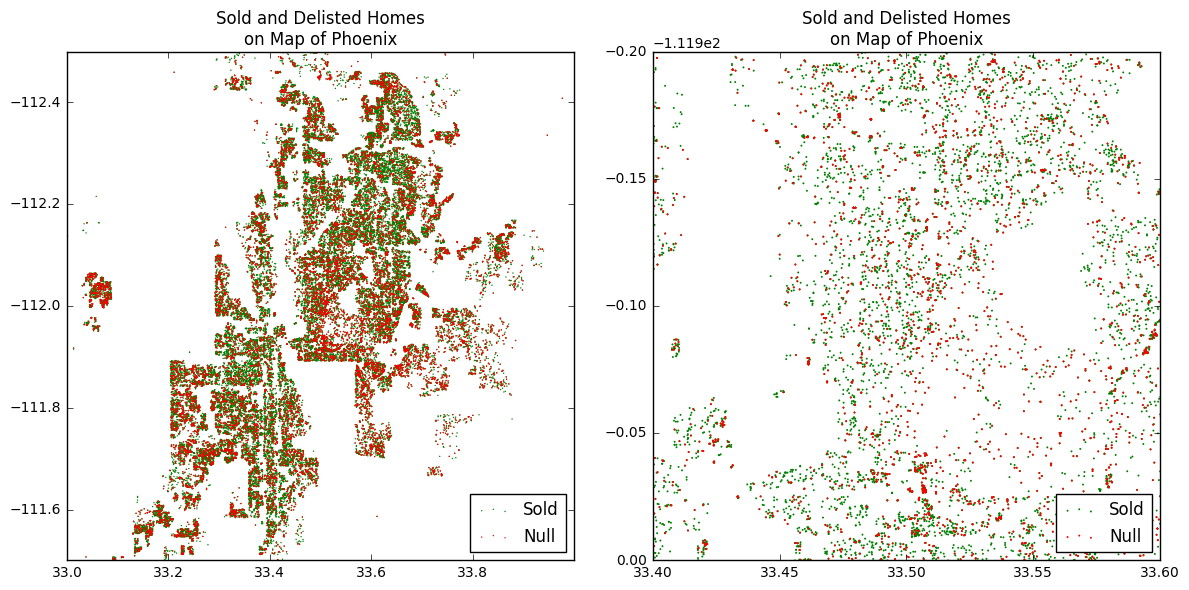

In [9]:
## Test ClosePrice: Verify unbiased null data

ClosePriceNull = df[df.ClosePrice.isnull()]
#ClosePriceNull.head(1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.xlim(33,34)
plt.ylim(-111.5,-112.5)
plt.scatter(df['GeoLat'], df['GeoLon'], s=1, c='g', edgecolor='none', label='Sold')
plt.scatter(ClosePriceNull['GeoLat'], ClosePriceNull['GeoLon'], s=1, c='r', edgecolor='none', label='Null')
plt.title('Sold and Delisted Homes\non Map of Phoenix')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.xlim(33.4,33.6)
plt.ylim(-111.9,-112.1)
plt.scatter(df['GeoLat'], df['GeoLon'], s=2, c='g', edgecolor='none', label='Sold')
plt.scatter(ClosePriceNull['GeoLat'], ClosePriceNull['GeoLon'], s=2, c='r', edgecolor='none', label='Null')
plt.title('Sold and Delisted Homes\non Map of Phoenix')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [10]:
## ClosePrice:  <--Last pre-processing step!
## Exclude Null ClosePrice Data, because it doesn't inform the ML algo
df = df[df.ClosePrice.notnull()].reset_index(drop=True)
# Removes are rows with no ClosePrice and resets index

In [11]:
## Confirm Dataset Cleaned!
print(df.shape)
print('Percent missing data:\n', sep='')
df.isnull().sum()

(37934, 15)
Percent missing data:



ListingId          0
LivingArea         0
NumBedrooms        0
NumBaths           0
Pool               0
ExteriorStories    0
ListDate           0
ListPrice          0
GeoLat             0
GeoLon             0
PublicRemarks      0
CloseDate          0
ClosePrice         0
ListingStatus      0
DwellingType       0
dtype: int64

### Filter Outliers
#### These are assumptions, which may be challenged over time as business model changes.

In [12]:
## Remove Baths Greater than 10, why b/c these are probably McMansions and Condo-complexes
df = df[df.NumBaths<=10].reset_index(drop=True)

In [13]:
## Remove listings over 1 Million, Since algo is focused on $200-500k properties.
#df[df.ClosePrice>500000].sort(['ClosePrice','ListingId'], ascending=[0, 1])
df = df[df.ClosePrice<=1000000].reset_index(drop=True)

In [14]:
df.describe()

ListingId    LivingArea   NumBedrooms      NumBaths  \
count  3.759100e+04  37591.000000  37591.000000  37591.000000   
mean   5.120519e+06   1910.179051      3.230906      2.225845   
std    2.540552e+04    750.295737      0.904067      0.599427   
min    5.077408e+06      0.000000      0.000000      0.000000   
25%    5.098414e+06   1397.000000      3.000000      2.000000   
50%    5.119911e+06   1756.000000      3.000000      2.000000   
75%    5.142504e+06   2254.000000      4.000000      2.500000   
max    5.178286e+06   8822.000000      8.000000      8.000000   

       ExteriorStories     ListPrice        GeoLat        GeoLon  \
count     37591.000000  3.759100e+04  37591.000000  37591.000000   
mean          1.335266  2.347503e+05     33.490748   -112.001418   
std           0.796535  1.429895e+05      0.245409      0.293840   
min           1.000000  8.500000e+03     31.444146   -114.680805   
25%           1.000000  1.439000e+05     33.362858   -112.206922   
50%           1.000000  1.990000e+05     33.480376   -112.010082   
75%           2.000000  2.850000e+05     33.616682   -111.804504   
max          23.000000  1.220000e+06     36.775648   -109.092285   

           ClosePrice  
count    37591.000000  
mean    228583.102392  
std     137755.224547  
min          1.000000  
25%     140000.000000  
50%     194500.000000  
75%     279000.000000  
max    1000000.000000

<a id='section3'></a>
### Feature Engineering

In [15]:
## Convert Dates: str to Datetime
df['ListDate'] = pd.to_datetime(df['ListDate'])
df['CloseDate'] = pd.to_datetime(df['CloseDate'])
## Convert Dates: datetime to ordinals
df['CloseDateInt'] = df['CloseDate'].apply(lambda x: x.toordinal())
df['ListDateInt'] = df['ListDate'].apply(lambda x: x.toordinal())

In [16]:
## Add TimeToClose  # Hypothesis: As time to close -> increases, ClosePrice decreases
df['TimeToClose'] = df['CloseDateInt'] - df['ListDateInt']

In [17]:
## Generate Postal Code
## Input: (Lat/Long/(zipcode/geoJSON)) -> output: Zip Code
#import sys  # Used to import method from file
#sys.path.insert(1,'/users/wschram/Documents/Github/Regression_Challenge')

import json
import geojson

## Load Data Set
zips = pd.read_csv('zips.csv')
zips['polygon'] = zips['geojson'].apply(lambda x : list(geojson.utils.coords(json.loads(x))))

# Force Lat and Lon to float
zips['Lat'] = np.nan  #.astype(float)
zips['Lon'] = np.nan  #.astype(float)
# Use mean of path as Centroid proxy
zips['Lat'] = zips['polygon'].apply(lambda x : np.mean([pair[1] for pair in x ])) #<-doesn't work!
zips['Lon'] = zips['polygon'].apply(lambda x : np.mean([pair[0] for pair in x ]))

## Method: Ray Casting
def point_in_poly(x, y, poly):

    n = len(poly)
    inside = False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y
        
    return inside


## Convert Lat/Lon, via a GeoJSON polygon, to Postal Code
def coord_in_zip(Lat, Lon, zips):
    # sort zips by Lat, and in the future Lon
    df2 = zips.ix[((zips.Lat-Lat)+(zips.Lon-Lon)).abs().argsort()].reset_index(drop=True) # [:20] , after argsort()
    #df2 = zips.ix[(zips.Lat-Lat).abs().argsort()[:8]].reset_index(drop=True)  # OLD: 1-axis version
    # Test Lat/Lon against zipcode geoJSON, return Postal Code
    for row in range(len(df2)):
        if point_in_poly(Lon, Lat, df2['polygon'].loc[row]) == True:
            return df2['postal_code'].loc[row]
        else:
            pass

ImportError: No module named 'geojson'

In [ ]:
## Postal Code Array (00h43m47s)
start_time = time.time()

df['PostalCode'] = np.nan
for i in range(0, len(df)):
    if pd.isnull(df['PostalCode'][i]) == True:
        df.loc[i,'PostalCode'] = coord_in_zip(df['GeoLat'][i], df['GeoLon'][i], zips)  # Replaced: df['PostalCode'][i]
    else: pass

stop_time = time.time()
print("Computation time: %.2fs" % (stop_time - start_time))
os.system('say "Computation complete!"');


## Debug
#print(df['GeoLat'][4],df['GeoLon'][4])
#print( df.loc[12830:12860,'PostalCode'] )
#row = 508
#print(df['GeoLat'][row],df['GeoLon'][row])
#print( pd.isnull( df['PostalCode'][1] ) )

In [ ]:
## Summary
count = df['PostalCode'].isnull().sum()
print('Number of rows without a Postal Code\t:', count)  
print('Number of rows total\t\t\t:', len(df))

In [ ]:
## Add PostalCode with Web Queries
##    b/c long / lat doesn't define neighborhoods or school dist.
##    A dummy vector of the zip is better!
### --> DANGER: this code takes a long time to run! <--

from geopy.geocoders import Nominatim

geolocator = Nominatim()

for n in range(0,len(df)):   # len(df)  #0,len(df2) #100=35s  500=2m:41s
    try:
        if math.isnan(df.loc[n,'PostalCode']) == True:
            df.loc[n,'PostalCode'] = int(geolocator.reverse('{lat}, {long}'.format(lat=str(df.loc[n,'GeoLat']), long=str(df.loc[n,'GeoLon']))).raw['address']['postcode'])
        else: pass # Row already solved!
    except: 
        print(n, df.loc[n,'GeoLat'], df.loc[n,'GeoLon'], df.loc[n,'PostalCode'])


#import os; 
os.system('say "Postal code web queries complete!"');
#os.system('say beep');

## Debug Tools
#type( df.loc[37932,'PostalCode'] )
#df.loc[2511,]
#df.loc[11:500,['ZipCode']]
#df.loc[1600:1610,['GeoLat','GeoLon','ZipCode']]
#df['ZipCode'].value_counts()
#df['GeoLat'].value_counts()

In [ ]:
## Summary
count = df['PostalCode'].isnull().sum()
print('Number of rows without a Postal Code\t:', count)  
print('Number of rows total\t\t\t:', len(df))

In [ ]:
## Change 'NaN' to '-1'
df['PostalCode'].fillna(-1, inplace=True)  

In [ ]:
## CAUTION!!! Do not overwrite FeatureEngineering.csv 
## Save to .csv / .json / .txt
#df.to_csv('FeatureEngineering.csv')

In [ ]:
## Read from .csv / .json / .txt
df = pd.read_csv('FeatureEngineering.csv')

#print( df.columns.tolist() )
df = df.drop(df.columns[0],axis=1)  #'Unnamed: 0',axis=1
df['PublicRemarks'].fillna(' ', inplace=True)  # Write to csv, removes ' ' cells

df.head(1)
#df.describe()

<a id='section4'></a>  
### Preprocessing - Convert Categorical to Dummy Vectors
Here we address what information is obtained from postal code, pool type, and Dwelling type.  

In [ ]:
## Convert Categorical vectors to dummy (1-hot encoded) binary vectors 
### --> Proven less effective than a 0-n encoding based on utility
###        or avg. valuation.

#def gen_dummies(dfColumn,columnName):
#    data = pd.DataFrame({columnName: dfColumn})
#    res = pd.get_dummies(data)
#    return res

## Generate Dummy Vectors
#poolDummies = gen_dummies(df['Pool'], 'Pool')  #list(df.columns.values)[4]
#dwellingTypeDummies = gen_dummies(df['DwellingType'], 'DwellingType')  #list(df.columns.values)[14]

## Concatenate with df
#df = pd.concat([df, poolDummies], axis=1, join_axes=[df.index])
#df = pd.concat([df, dwellingTypeDummies], axis=1, join_axes=[df.index])
#df.head(3)

In [ ]:
## Convert Categorical Data to a 'hot-encoding'
# Note that the magnitude that will be assessed is based on the analyst's 
# belief in the relative utility of the option on ClosePrice.
# Effectively this turns the features from categorical to ordinal.
# Ex. X[:, 0] = LabelEncoder().fit_transform(X[:,0])

## First 'Pool' Data Set (0-3 Hot-encoding)
lePool = preprocessing.LabelEncoder()
#lePool.fit(df['Pool'])
lePool.classes_ = ['None', 
                   'Community',
                   'Private', 
                   'Both Private & Community'] # Question this assumption!
#list(lePool.classes_)
df['PoolOrd'] = np.empty(len(df), dtype=int)
df['PoolOrd'] = lePool.transform(df['Pool'])
#df.head(1)

In [18]:
## Second DwellingType (0-7 Hot-encoding)
# Rank was determined by assessing the mean ClosePrice of the
# respective DwellingType.
leDT = preprocessing.LabelEncoder()
#leDT.fit(df['DwellingType'])
leDT.classes_ = ['Modular/Pre-Fab',
                 'Mfg/Mobile Housing',
                 'Gemini/Twin Home',
                 'Apartment Style/Flat',
                 'Loft Style',
                 'Townhouse',
                 'Patio Home',
                 'Single Family - Detached']
#list(leDT.classes_)
df['DwellingTypeOrd'] = np.empty(len(df), dtype=int)
df['DwellingTypeOrd'] = leDT.transform(df['DwellingType'])
df.head(1)

ListingId  LivingArea  NumBedrooms  NumBaths     Pool  ExteriorStories  \
0    5077408      2230.0            4       2.0  Private              1.0   

    ListDate  ListPrice     GeoLat      GeoLon  \
0 2014-03-01   475000.0  33.650984 -111.963151   

                                       PublicRemarks  CloseDate  ClosePrice  \
0  ery special home in popular rabian iews feels ... 2014-06-24    460000.0   

  ListingStatus              DwellingType  CloseDateInt  ListDateInt  \
0        Closed  Single Family - Detached        735408       735293   

   TimeToClose  DwellingTypeOrd  
0          115                7

In [19]:
## Third PostalCode to Dummy (n-hot encoding)
## This is not necessary given the numeric nature of the attribute.
#lePC = preprocessing.LabelEncoder()
#lePC.fit(df['PostalCode'])
##list(lePC.classes_)
#df['PostalCodeOrd'] = np.empty(len(df), dtype=int)
#df['PostalCodeOrd'] = lePC.transform(df['PostalCode'])
#df.head(1)

In [20]:
## Deprecated with (n-hot encoding) ##

## Third PostalCode to Dummy (1-hot encoded) Binary Vectors
### --> Proven less effective than a 0-n encoding based on utility
###        or avg. valuation. But we'll start here.

## Reformat PostalCode to String
#df['PostalCode'] = df['PostalCode'].map('{:.0f}'.format)
#df['PostalCode'] = df['PostalCode'].astype('str') #.astype(int)
## Replace nan with -1
#df['PostalCode'] = df['PostalCode'].replace({'nan': -1})  

# Generate Dummy Vectors
#postalCodeDummies = pd.get_dummies(df['PostalCode'], prefix='Zip')  #list(df.columns.values)[20]
##print(postalCodeDummies)  

## Concatenate with df
#df = pd.concat([df, postalCodeDummies], axis=1, join_axes=[df.index])
##df.head(3)

In [21]:
## Create PublicRemarks n-gram vectors
## http://scikit-learn.org/stable/modules/feature_extraction.html
from sklearn.feature_extraction.text import CountVectorizer

corpus = df['PublicRemarks']

## Write a custom tokenizer and move df['PublicRemarks']
## formatting to this section!

# Noun Phrases in order of importance:
vocab = ['patio', 'fireplace', 'fans',
         'covered patio', 'car garage', 'bedroom bath',
         'breakfast bar', 'spa', 'vaulted ceiling', 
         'ceiling fans', 'walk in closet', 'move in ready', 
         'washer dryer', 'appliances', 'granite', 
         'trees',
         # Untested:
         'air conditioning', 'hot tub', 'hardwood',
         'fruit trees', 
# Care of Zillow (Cause the property to move faster, not necessarily alter value):
# Source: 
# http://www.marketwatch.com/story/using-thesekeywords-in-your-listing-could-sell-your-home-faster-2016-04-15
#         'barn door', 'shaker cabinet', 'farmhouse sink',
#         'subway tile', 'quartz', 'craftsman', 
#         'exposed brick', 'pendant light', 'frameless shower',
#         'heated floors', 'stainless steel', 'granite',
#         'backsplash', 'tankless water heater', 'outdoor kitchen',
        ]

## Bad indicators: 'HOA', 'garage', 'air condition',
##                 'fixer upper', 'tree', 'BBQ Grill', 
##                 'fire pit', 'BBQ', 'hardwood floor',
##                 'AC', 'hottub', 'new water heater',

vect = CountVectorizer(ngram_range=(1,4),  # (1,1) or (1,2)
                             lowercase=True,  # Convert to lowercase
                             token_pattern=r'\b\w+\b', # r'\b\[0-9]+|w+\b'
                             vocabulary = vocab,  # List of strings
                             max_features = 250,
                             min_df=2,  # at least n letters in gram
                            )

SparseMatrix = vect.fit_transform(corpus).toarray()
VectSparseMatrix = pd.DataFrame((vect.fit_transform(corpus).toarray()), 
                                columns=[vect.get_feature_names()])
# print(VectSparseMatrix)

#  TF-IDF  # This doesn't work try using the TF-IDF Vectorizer!!!
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf = TfidfTransformer(norm="l2")
#tfidf.fit(freq_term_matrix)
#VectSparseMatrix = TfidfTransformer(VectSparseMatrix)

#Experiement with .to_sparse() to remove zeros from df.
#PandasSparseMatrix  # Returns size of sparse matrix

In [22]:
## Debug: List PublicRemarks Attributes 
#df['PublicRemarks'][5]
#vectorizer.get_feature_names()
#PandasSparseMatrix.describe()
#VectSparseMatrix.shape
#PandasSparseMatrix.isnull().sum()

In [23]:
## Concatenate PublicRemark Attributes to dataframe
data = pd.concat([df, VectSparseMatrix], axis=1, join_axes=[df.index])
data = data.fillna(0)  # Catches NAs in dataset, found by RandomForest

## Test concat
print(data.shape)
#df.isnull().sum()

(37591, 39)


In [24]:
## CAUTION!!! Do not overwrite DummyVectors.csv 
## Save to .csv / .json / .txt
#df.to_csv('DummyVectors.csv')

In [25]:
## Read from .csv / .json / .txt
data = pd.read_csv('DummyVectors.csv')
data = data.drop(data.columns[0],axis=1)  #'Unnamed: 0',axis=1
data.head(1)
#df.describe()
print(data.shape)

(37591, 21)


<a id='section5'></a>
## Analysis - Data Set Creation

In [26]:
## Generate Training and Test Data Set (X , y)
# Training Variables
X = data.drop(['ListDate',
               'PublicRemarks',  #May add n-grams to create booleans from this feature
               'CloseDate',
               'ClosePrice',
               'ListingStatus',
               'Pool',
               'DwellingType',], axis=1)  # 'PostalCode'
headers = X.dtypes.index

print(X.shape)

X.describe()

(37591, 14)


ListingId    LivingArea   NumBedrooms      NumBaths  \
count  3.759100e+04  37591.000000  37591.000000  37591.000000   
mean   5.120519e+06   1910.179051      3.230906      2.225845   
std    2.540552e+04    750.295737      0.904067      0.599427   
min    5.077408e+06      0.000000      0.000000      0.000000   
25%    5.098414e+06   1397.000000      3.000000      2.000000   
50%    5.119911e+06   1756.000000      3.000000      2.000000   
75%    5.142504e+06   2254.000000      4.000000      2.500000   
max    5.178286e+06   8822.000000      8.000000      8.000000   

       ExteriorStories     ListPrice        GeoLat        GeoLon  \
count     37591.000000  3.759100e+04  37591.000000  37591.000000   
mean          1.335266  2.347503e+05     33.490748   -112.001418   
std           0.796535  1.429895e+05      0.245409      0.293840   
min           1.000000  8.500000e+03     31.444146   -114.680805   
25%           1.000000  1.439000e+05     33.362858   -112.206922   
50%           1.000000  1.990000e+05     33.480376   -112.010082   
75%           2.000000  2.850000e+05     33.616682   -111.804504   
max          23.000000  1.220000e+06     36.775648   -109.092285   

        CloseDateInt    ListDateInt   TimeToClose    PostalCode       PoolOrd  \
count   37591.000000   37591.000000  37591.000000  37591.000000  37591.000000   
mean   735467.683807  735378.136628     89.547179  85116.901652      1.651033   
std        77.768223      52.758998     60.106152   3079.691493      1.218400   
min    735294.000000  735293.000000      0.000000     -1.000000      0.000000   
25%    735409.000000  735332.000000     46.000000  85118.000000      0.000000   
50%    735463.000000  735375.000000     71.000000  85248.000000      2.000000   
75%    735514.000000  735423.000000    116.000000  85323.000000      2.000000   
max    735688.000000  735476.000000    382.000000  86601.000000      4.000000   

       DwellingTypeOrd  
count     37591.000000  
mean          6.620228  
std           1.650448  
min           0.000000  
25%           7.000000  
50%           7.000000  
75%           7.000000  
max           8.000000

In [27]:
## Nornalize or Standardize
# Standarize to reduce Variance and solve for l1 (Bias)
# Normalize to reduce bias and solve for l2 (Variance)

## Normalize Dataset (Vectors from 0-1)
X_norm = (X - X.min()) / (X.max() - X.min())

## Standardize Dataset (easier to set the l1_ratio parameter)
X_std = X/X.std() # X /= X.std(axis=0) 

X_std.describe()

ListingId    LivingArea   NumBedrooms      NumBaths  \
count  37591.000000  37591.000000  37591.000000  37591.000000   
mean     201.551416      2.545902      3.573745      3.713285   
std        1.000000      1.000000      1.000000      1.000000   
min      199.854516      0.000000      0.000000      0.000000   
25%      200.681364      1.861932      3.318337      3.336517   
50%      201.527499      2.340410      3.318337      3.336517   
75%      202.416794      3.004149      4.424449      4.170646   
max      203.825228     11.758030      8.848897     13.346068   

       ExteriorStories     ListPrice        GeoLat        GeoLon  \
count     37591.000000  37591.000000  37591.000000  37591.000000   
mean          1.676344      1.641731    136.469252   -381.165206   
std           1.000000      1.000000      1.000000      1.000000   
min           1.255438      0.059445    128.129689   -390.283741   
25%           1.255438      1.006368    135.948121   -381.864577   
50%           1.255438      1.391711    136.426989   -381.194690   
75%           2.510876      1.993154    136.982416   -380.495063   
max          28.875074      8.532097    149.854677   -371.264791   

       CloseDateInt   ListDateInt   TimeToClose    PostalCode       PoolOrd  \
count  37591.000000  37591.000000  37591.000000  37591.000000  37591.000000   
mean    9457.174823  13938.440223      1.489817     27.638126      1.355084   
std        1.000000      1.000000      1.000000      1.000000      1.000000   
min     9454.941471  13936.826534      0.000000     -0.000325      0.000000   
25%     9456.420225  13937.565744      0.765313     27.638483      0.000000   
50%     9457.114596  13938.380771      1.181243     27.680695      1.641498   
75%     9457.770390  13939.290568      1.929919     27.705048      1.641498   
max     9460.007808  13940.295136      6.355423     28.120024      3.282995   

       DwellingTypeOrd  
count     37591.000000  
mean          4.011170  
std           1.000000  
min           0.000000  
25%           4.241272  
50%           4.241272  
75%           4.241272  
max           4.847168

In [28]:
# Prediction Variable
y = data['ClosePrice']
y.shape

(37591,)

## Generate Test / Train  OR  Validate / Test / Train Datasets

In [29]:
## Divide set into 66/33 (Train/Validation)/Test sets
## Use when comparing algorithms.
## In k-fold validation train and test data will interchange
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size=0.66, test_size=0.33, random_state=0)

In [30]:
## Divide set into 60/20/20 Train/Validation/Test sets 
## Use when comparing algorithms.
#X_train, X_intermediate, y_train, y_intermediate = cross_validation.train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=0)
#X_validation, X_test, y_validation, y_test = cross_validation.train_test_split(X_intermediate, y_intermediate, train_size=0.5, test_size=0.5, random_state=0)

<a id='section6'></a>
## Analysis - Linear Model Selection

### Ridge Regression Model

In [32]:
from sklearn.linear_model import Ridge
print("Computing regularization path using Ridge Regression...")
t1 = time.time()
RR = Ridge(alpha = .5).fit (X_train, y_train)
t_ridge = time.time() - t1
print("Model ran in %.2fs" % (t_ridge))


print(RR.coef_)
print(RR.intercept_)

Computing regularization path using Ridge Regression...
Model ran in 0.01s
[ -6.16488052e-02   5.70440832e-01   7.97637657e+02   1.65902562e+02
  -1.88292860e+02   9.56779693e-01  -1.74810667e+03  -5.89702987e+02
   3.97156648e+00   2.36518869e+01  -1.96802656e+01   9.94901022e-02
   3.00831764e+02   9.14215815e+01]
-20013426.6914


In [33]:
## Compute Output Variables
# Mean Squared Error
RR_mse = mean_squared_error(y_test, RR.predict(X_test))
print("MSE: %.4f" % RR_mse)

# CV(RMSD), coefficient of variation, st.dev/mean
RR_cvrmsd = math.sqrt(RR_mse)/np.mean(y_test)
print('Coefficient of Variation, CV(RMSD): %.6f' % RR_cvrmsd)

# R^2 Score
RR_r2 = r2_score(y_test, RR.predict(X_test))
print("R^2 Score: %.6f" % RR_r2)

# Plot the approximation
#plot_data()
#plt.plot(x_plot, model.predict(x_plot[:, np.newaxis]), color='r', linewidth=2)

MSE: 109501700.0475
Coefficient of Variation, CV(RMSD): 0.045660
R^2 Score: 0.994283


### Ridge Regression Cross-Validation

In [34]:
from sklearn.linear_model import RidgeCV

In [35]:
# Compute paths
print("Computing regularization path using Ridge Regression Cross-Validation...")
t1 = time.time()
RCV = RidgeCV(alphas=[0.01, 0.1, 0.5, 1.0, 10.0], cv=20).fit(X_train, y_train)
t_ridge_cv = time.time() - t1
print("Model ran in %.2fs" % (t_ridge_cv))

print(RCV.coef_)
print(RCV.intercept_)

Computing regularization path using Ridge Regression Cross-Validation...
Model ran in 4.36s
[ -6.17381416e-02   5.72371536e-01   7.97233105e+02   1.65752966e+02
  -1.88206878e+02   9.56768442e-01  -1.73450861e+03  -5.83699749e+02
   3.98539702e+00   2.36815645e+01  -1.96961650e+01   9.95971089e-02
   3.00856207e+02   9.15472873e+01]
-20044756.5212


In [36]:
## Compute Output Variables
# Mean Squared Error
RCV_mse = mean_squared_error(y_test, RCV.predict(X_test))
print("MSE: %.4f" % RCV_mse)

# CV(RMSD), coefficient of variation, st.dev/mean
RCV_cvrmsd = math.sqrt(RCV_mse)/np.mean(y_test)
print('Coefficient of Variation, CV(RMSD): %.6f' % RCV_cvrmsd)

# R^2 Score
RCV_r2 = r2_score(y_test, RCV.predict(X_test))
print("R^2 Score: %.6f" % RCV_r2)

MSE: 109499540.9357
Coefficient of Variation, CV(RMSD): 0.045660
R^2 Score: 0.994283


### LassoCV Model
Assumptions:  
  • Data contains many collinear regressors  

In [37]:
from sklearn.linear_model import LassoCV

In [38]:
# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
LCV = LassoCV(cv=20).fit(X_train, y_train)
t_lasso_cv = time.time() - t1
print("Model ran in %.2fs" % (t_lasso_cv))

print(LCV.coef_)
print(LCV.intercept_)

Computing regularization path using the coordinate descent lasso...
Model ran in 0.79s
[-0.         0.         0.         0.        -0.         0.9595204 -0.        -0.
 -0.        -0.        -0.         0.         0.         0.       ]
3382.05224277


(-10.291942419637376,
 -7.2919424196373743,
 68636962.505445793,
 21851637292.466206)

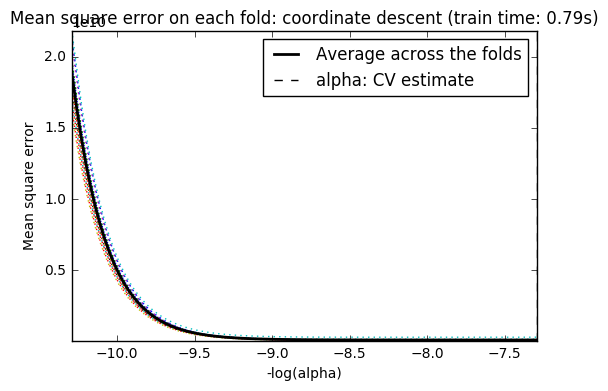

In [39]:
# Display results
m_log_alphas = -np.log10(LCV.alphas_)

plt.figure()
#ymin, ymax = 0, 2.2
plt.plot(m_log_alphas, LCV.mse_path_, ':')
plt.plot(m_log_alphas, LCV.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(LCV.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
#plt.ylim(ymin, ymax)
#plt.ylim()

In [40]:
## Compute Output Variables
# Mean Squared Error
LCV_mse = mean_squared_error(y_test, LCV.predict(X_test))
print("MSE: %.4f" % LCV_mse)

# CV(RMSD), coefficient of variation, st.dev/mean
LCV_cvrmsd = math.sqrt(LCV_mse)/np.mean(y_test)
print('Coefficient of Variation, CV(RMSD): %.6f' % LCV_cvrmsd)

# R^2 Score
LCV_r2 = r2_score(y_test, LCV.predict(X_test))
print("R^2 Score: %.6f" % LCV_r2)

MSE: 111988368.1931
Coefficient of Variation, CV(RMSD): 0.046176
R^2 Score: 0.994153


### LassoLarsCV Model
Assumptions:  
    • More samples than features  
    
Benefits:  
    • More Alpha values explored  
    • Faster solution than LassoCV  

In [41]:
from sklearn.linear_model import LassoLarsCV

In [42]:
## Compute Lars Lasso
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
LLCV = LassoLarsCV(cv=20).fit(X_train, y_train)
t_lasso_lars_cv = time.time() - t1
print("Model ran in %.2fs" % (t_lasso_lars_cv))

print(LLCV.coef_)
print(LLCV.intercept_)

Computing regularization path using the Lars lasso...
Model ran in 0.79s
[ -4.21169742e-03   5.70783352e-01   7.98170313e+02   1.58604002e+02
  -1.84656059e+02   9.56769831e-01  -1.73992225e+03  -5.79640236e+02
   0.00000000e+00   0.00000000e+00  -1.57302089e+01   9.83263283e-02
   2.98552217e+02   9.03954461e+01]
7125.27825218


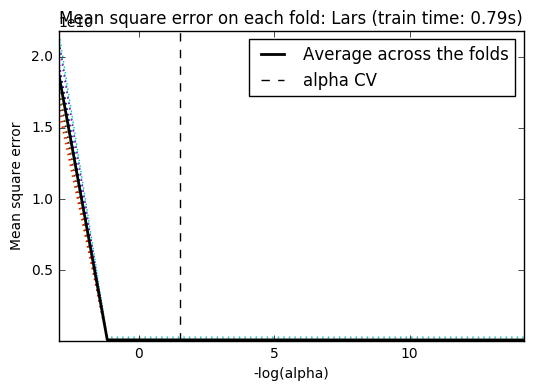

In [43]:
## Display results
m_log_alphas = -np.log10(LLCV.cv_alphas_)

plt.figure()
#ymin, ymax = 0, 2
plt.plot(m_log_alphas, LLCV.cv_mse_path_, ':')
plt.plot(m_log_alphas, LLCV.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(LLCV.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
#plt.ylim(ymin, ymax)

plt.show()

In [44]:
## Compute Output Variables
# Mean Squared Error
LLCV_mse = mean_squared_error(y_test, LLCV.predict(X_test))
print("MSE: %.4f" % LLCV_mse)

# CV(RMSD), coefficient of variation, st.dev/mean
LLCV_cvrmsd = math.sqrt(LLCV_mse)/np.mean(y_test)
print('Coefficient of Variation, CV(RMSD): %.6f' % LLCV_cvrmsd)

# R^2 Score
LLCV_r2 = r2_score(y_test, model.predict(X_test))
print("R^2 Score: %.6f" % LLCV_r2)

MSE: 109490656.3978
Coefficient of Variation, CV(RMSD): 0.045658


NameError: name 'model' is not defined

### Elastic Net Cross-Validation Model

Computing regularization path using the elastic net...


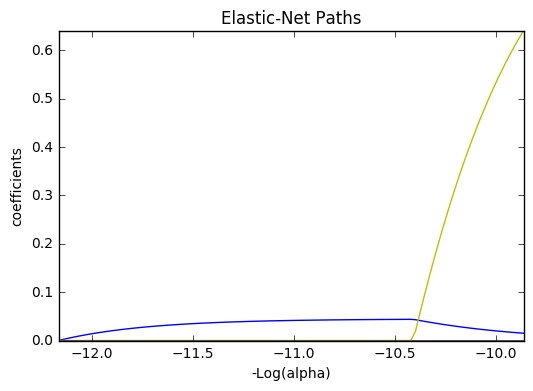

In [45]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause
# Source: http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path

#X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

#print("Computing regularization path using the lasso...")
#alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X_train, y_train, eps=eps, l1_ratio=0.8, fit_intercept=False)

# Display results

plt.figure(1)
ax = plt.gca()
#ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
#l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)  #, linestyle='--'

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths')
#plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')

plt.show()

##### ElasticNetCV to solve for l1_ratio (rho)

In [46]:
## Compute Elastic Net CV
from sklearn.linear_model import ElasticNetCV

print("Computing regularization path using the ElasticNetCV...")
t1 = time.time()
ENCV = ElasticNetCV(l1_ratio=[0, .01, .05, .1, .15, .5, .7, .9, .95, .99, 1], cv=20)
ENCV.fit(X_train, y_train)
t_lasso_lars_cv = time.time() - t1
print("Model ran in %.2fs" % (t_lasso_lars_cv))

print(ENCV.coef_)
print(ENCV.intercept_)

Computing regularization path using the ElasticNetCV...


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  (n_samples * l1_ratio))
//anaconda/lib/python3.5/site-packages/numpy/core/function_base.py:99: RuntimeWarning: invalid value encountered in double_scalars
  delta = stop - start
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:443: RuntimeWarning: invalid value encountered in double_scalars
  l1_reg = alpha * l1_ratio * n_samples


Model ran in 14.52s
[-0.         0.         0.         0.        -0.         0.9595204 -0.        -0.
 -0.        -0.        -0.         0.         0.         0.       ]
3382.05224277


In [47]:
## Compute Output Variables
# Mean Squared Error
ENCV_mse = mean_squared_error(y_test, ENCV.predict(X_test))
print("MSE: %.4f" % ENCV_mse)

# CV(RMSD), coefficient of variation, st.dev/mean
ENCV_cvrmsd = math.sqrt(ENCV_mse)/np.mean(y_test)
print('Coefficient of Variation, CV(RMSD): %.6f' % ENCV_cvrmsd)

# R^2 Score
ENCV_r2 = r2_score(y_test, ENCV.predict(X_test))
print("R^2 Score: %.6f" % ENCV_r2)

MSE: 111988368.1931
Coefficient of Variation, CV(RMSD): 0.046176
R^2 Score: 0.994153


### Summary of Linear Regressors

In [48]:
print('Ridge Regression Coefficient of Variation, CV(RMSD): %.6f' % RR_cvrmsd)
print('RidgeCV Coefficient of Variation, CV(RMSD):          %.6f' % RCV_cvrmsd)
print('LassoCV Coefficient of Variation, CV(RMSD):          %.6f' % LCV_cvrmsd)
print('LassoLarsCV Coefficient of Variation, CV(RMSD):      %.6f' % LLCV_cvrmsd)
print('ElasticNetCV Coefficient of Variation, CV(RMSD):     %.6f' % ENCV_cvrmsd)

Ridge Regression Coefficient of Variation, CV(RMSD): 0.045660
RidgeCV Coefficient of Variation, CV(RMSD):          0.045660
LassoCV Coefficient of Variation, CV(RMSD):          0.046176
LassoLarsCV Coefficient of Variation, CV(RMSD):      0.045658
ElasticNetCV Coefficient of Variation, CV(RMSD):     0.046176


<a id='section7'></a>
## Regression Model: Gradient Boosting Regression

In [49]:
## Hyperparameter Grid_Search for GBR
## https://www.youtube.com/watch?v=-5l3g91NZfQ
start_time = time.time()


from sklearn.grid_search import GridSearchCV

param_grid = {'learning_rate': [0.018], #  {0.1, 0.01, 0.001}
              'max_depth': [12],  #  {4, 6, 8, 10, 12} # Experts claim 4-6 is best! 10-12 is better?
              'n_estimators': [500],  #  {500, 1000} # More is Better!
              'min_samples_split': [4], #  {1, 5, 10} # More reduces bias from outliers
              'loss': ['huber']  # {'ls', 'lad', 'huber', 'quantile'}
              }

model = ensemble.GradientBoostingRegressor()
gs_cv = GridSearchCV(model, param_grid, scoring='mean_squared_error', n_jobs=4, verbose=2).fit(X_train, y_train)
# n_jobs = Number of jobs to run in parallel.

#Best hyperparameter setting
print('Best hyperparameters: %r' % gs_cv.best_params_)
#print('Best score: %.4f' % gs_cv.best_score_)

## Gradient Boosting Regression model
model = ensemble.GradientBoostingRegressor(**gs_cv.best_params_).fit(X_train, y_train)


stop_time = time.time()
print("Regressor ran in %.2fs" % (stop_time - start_time))
os.system("say 'Computation Complete!'")

Fitting 3 folds for each of 1 candidates, totalling 3 fits


//anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[CV] learning_rate=0.018, loss=huber, min_samples_split=4, max_depth=12, n_estimators=500 
[CV] learning_rate=0.018, loss=huber, min_samples_split=4, max_depth=12, n_estimators=500 
[CV] learning_rate=0.018, loss=huber, min_samples_split=4, max_depth=12, n_estimators=500 


//anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  learning_rate=0.018, loss=huber, min_samples_split=4, max_depth=12, n_estimators=500 - 8.5min


//anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  learning_rate=0.018, loss=huber, min_samples_split=4, max_depth=12, n_estimators=500 - 8.5min
[CV]  learning_rate=0.018, loss=huber, min_samples_split=4, max_depth=12, n_estimators=500 - 8.5min


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:  8.5min finished


Best hyperparameters: {'learning_rate': 0.018, 'loss': 'huber', 'min_samples_split': 4, 'n_estimators': 500, 'max_depth': 12}
Regressor ran in 1355.32s


0

In [50]:
## Compute Output Variables
# Mean Squared Error
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)

# CV(RMSD), coefficient of variation, st.dev/mean
cvrmsd = math.sqrt(mse)/np.mean(y)
print('Coefficient of Variation, CV(RMSD): %.4f' % cvrmsd)

# R^2 Score
r2 = r2_score(y_test, model.predict(X_test))
print("R^2 Score: %.4f" % r2)

# Plot the approximation
#plot_data()
#plt.plot(x_plot, model.predict(x_plot[:, np.newaxis]), color='r', linewidth=2)

MSE: 126862145.2341
Coefficient of Variation, CV(RMSD): 0.0493
R^2 Score: 0.9934


<a id='section8'></a>
## Regression Performance
### Entire dataset for training, no need for train/test/validation

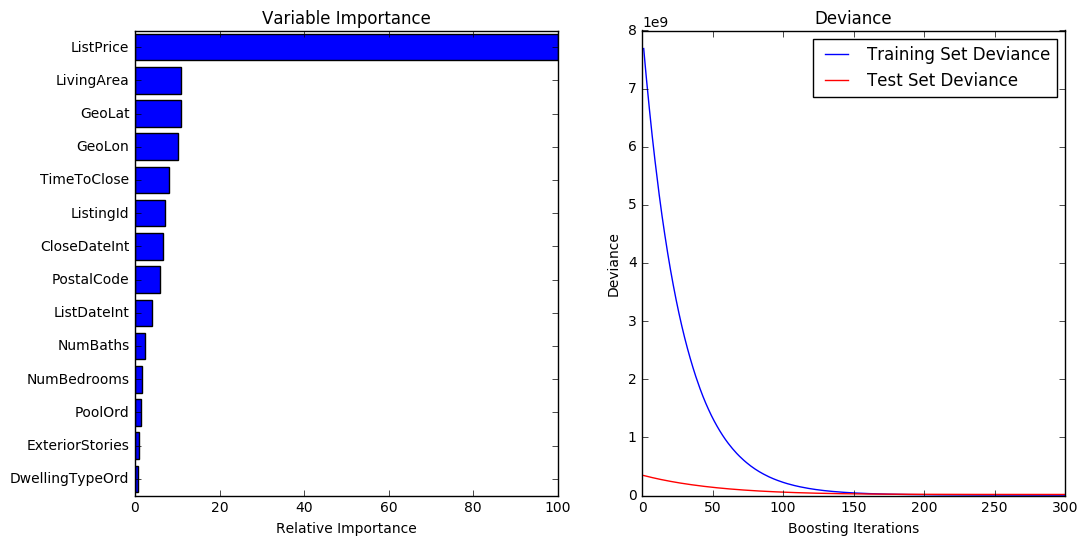

In [51]:
## Plot training deviance
# compute test set deviance
test_score = np.zeros((gs_cv.best_params_['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.title('Deviance')
plt.plot(np.arange(gs_cv.best_params_['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gs_cv.best_params_['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.xlim(0,300)

## Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


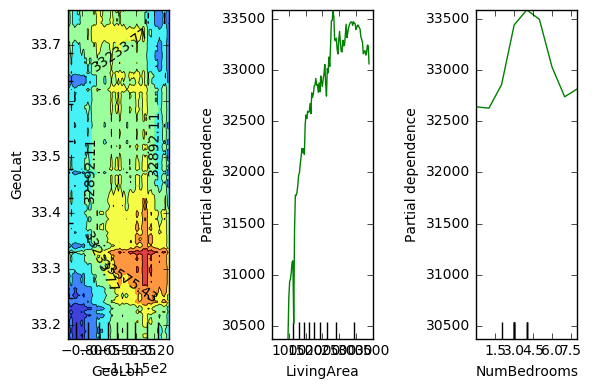

In [52]:
## Partial Dependency Plots

#X_train.columns
from sklearn.ensemble.partial_dependence import plot_partial_dependence

plt.figure()  # figsize=(30, 10)
#fig.set_size_inches(18.5, 10.5)

fig, axs = plot_partial_dependence(model, X_train,
                                   features = [[7,6], 1, 2],  #  [7,6] for 2.5D plot  1, 2, 3, 4, 5, 10, 11, 12, 13
                                   feature_names = X_train.columns,
                                   n_cols = 3)
fig.tight_layout()  # Or equivalently,  "plt.tight_layout()"
fig.show()

In [53]:
## Save Plots
fig.savefig('PartialDependence.pdf', bbox_inches='tight')  # .png
plt.close(fig) 

## Unfinished Analysis

In [ ]:
predDf.head(3)
#predDf['GeoLon']
predDf = pd.DataFrame({'GeoLon': X_test['GeoLon'], 
                       'GeoLat': X_test['GeoLat']})
predDf.head(3)

In [ ]:
## Plot Housing Price on Map
## http://www.tonicebrian.com/2012/11/05/training-gradient-boosting-trees-with-python/

from mpl_toolkits.basemap import Basemap
#predDf = pd.DataFrame(X_test.copy())
predDf = pd.DataFrame({'GeoLon': X_test['GeoLon'], 
                       'GeoLat': X_test['GeoLat']})
predDf['y_pred'] = model.predict(X_test)

def arizona_map(ax=None, lllat=32.5, urlat=34.8, lllon=-113.5, urlon=-110):
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    #m.drawstates()
    #m.drawcountries()
    m.drawcoastlines(color='lightblue')
    return m

plt.figure()
m = arizona_map()
predDf = predDf.sort_values(by='y_pred') # Useful for plotting
#x,y = m(predDf['GeoLon'], predDf['GeoLat'])
x = predDf['GeoLon'] 
y = predDf['GeoLat']
serieA = (np.array(predDf['y_pred']) 
          - predDf['y_pred'].min())/(predDf['y_pred'].max()-predDf['y_pred'].min())
# z = plt.cm.jet(serieA)
z = np.array(predDf['y_pred'])/1000
m.scatter(x=x, y=y, c=z, s=60, alpha=0.5, edgecolors='none')
c = m.colorbar(location='right')
c.set_label("House Value (Thousands of $)")
m.plot()
plt.show()

In [ ]:
### Doesn't work presently...!!! ###

## Plot Resulting Prediction vs. Test(Actual)
## Isn't necessary for Random Forests, save for test/train data challenges.

plt.figure(figsize=(6,6))

plt.scatter(y, model.oob_prediction_, color='blue', s=1, edgecolor='none')
plt.xlim(200000,500000)
plt.ylim(200000,500000)
plt.grid(True)
plt.ylabel('y_pred, ClosePrice Predicted [USD]')
plt.xlabel('y, ClosePrice Actual [USD]')
plt.title('Close Price Predicted vs. Actual')
plt.axes().set_aspect('equal') # 'datalim'
plt.show()

In [ ]:
## Error Measurement: Variance between Prediction and Actual ClosePrice
## Isn't necessary for Random Forests, save for other algos.
#mean_squared_error(y_test, y_pred)

In [ ]:
## Debug Tools
#df.head(3)
#df['DwellingType'].head(20)
#df.describe()
#df.dtypes
#df.shape  #[1]
#df['LivingArea'] = df['LivingArea'].astype('float32')
#X.head(1)

<a id='section9'></a>
## What is Next?

After model is finalized, train on whole dataset. This isn't necessary with random forest unless a test set was created to compare to other machine learning algorithms.

-/ Next, try GBM (Gradient Boosted Machines) and GLM (Generalized Linear Model). GBM Normally beats deep learning and GLM (and random forest with optimization). Use Mean-squared-error to compare regression models.  
  
Apply a meta-learner specifically a GLM (nnps) to stack/ensemble the algorithms.

Create generalized Low-rank model (GLRM) and add to stack/ensemble, many classification algorithms are derived from the GLRM based on it's configuration.

-/ Study of 'PublicRemarks', n-gram collection and vectorization to account for additional variance in ClosePrice.


### Missing data:  
Source: http://artsci.wustl.edu/~gradconf/conf2015/Papers2015/1_3_Ho.pdf    
- Age of home, when was it built/refreshed?  
- % of neighbors with bachelors  
- % of neighbors with mastors/adv. degree  
- quality of neighborhood schools  
-/ fireplace  - can be found in the PublicRemarks  

### Requested features:
- Early stopping k-fold cross-validation